In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_url ='https://raw.githubusercontent.com/bharathbharu7122/Data601_tuesday/main/4.csv'
df = pd.read_csv(data_url)

In [3]:
df

,Time,domain
0,2022-01-12 14:04:49,my3.my.umbc.edu
1,2022-01-12 14:04:51,webauth.umbc.edu
2,2022-01-12 14:04:51,webauth.umbc.edu
3,2022-01-12 14:05:00,webauth.umbc.edu
4,2022-01-12 14:05:01,my3.my.umbc.edu
...,...,...
5849,2022-04-16 14:57:57,www.google.com
5850,2022-04-16 14:58:43,www.google.com
5851,2022-04-16 14:58:44,www.google.com
5852,2022-04-16 14:59:52,www.google.com


In [4]:
df.head()

,Time,domain
0,2022-01-12 14:04:49,my3.my.umbc.edu
1,2022-01-12 14:04:51,webauth.umbc.edu
2,2022-01-12 14:04:51,webauth.umbc.edu
3,2022-01-12 14:05:00,webauth.umbc.edu
4,2022-01-12 14:05:01,my3.my.umbc.edu


In [5]:
df.tail()

,Time,domain
5849,2022-04-16 14:57:57,www.google.com
5850,2022-04-16 14:58:43,www.google.com
5851,2022-04-16 14:58:44,www.google.com
5852,2022-04-16 14:59:52,www.google.com
5853,2022-04-16 14:59:55,pypi.org


In [6]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [7]:
df.dropna( inplace=True)

In [8]:
df.dtypes

Time      object
domain    object
dtype: object

In [9]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [10]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [16]:
df['Time'] = pd.to_datetime(df['Time'])


In [17]:
# df['domain'] = df['domain'].astype(str)


In [18]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [19]:
df.head()

,Time,domain
0,2022-01-12 14:04:49,my3.my.umbc.edu
1,2022-01-12 14:04:51,webauth.umbc.edu
2,2022-01-12 14:04:51,webauth.umbc.edu
3,2022-01-12 14:05:00,webauth.umbc.edu
4,2022-01-12 14:05:01,my3.my.umbc.edu


In [20]:
df['domain'].value_counts()[:50]

www.google.com                                                   1151
webauth.umbc.edu                                                  868
github.com                                                        353
blackboard.umbc.edu                                               284
my.umbc.edu                                                       283
umbc-csm.symplicity.com                                           215
www.amazon.com                                                    197
watchseries.pub                                                   168
leetcode.com                                                      150
csprd-web.ps.umbc.edu                                             132
localhost:8888                                                    127
my3.my.umbc.edu                                                   121
mail.google.com                                                    79
www.linkedin.com                                                   78
fmovies.co          

<AxesSubplot:>

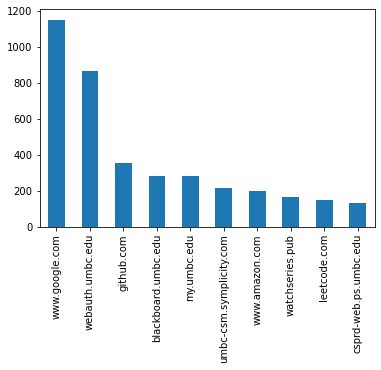

In [21]:
df['domain'].value_counts()[:10].plot(kind='bar')

In [22]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     133
1      29
2       9
3       1
6       2
8       3
9     231
10    266
11    492
12    437
13    332
14    450
15    379
16    471
17    418
18    403
19    592
20    358
21    279
22    177
23    392
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

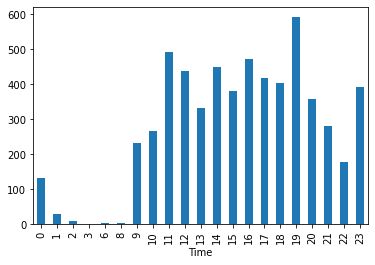

In [23]:
hourly_counts.plot.bar()

In [24]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-01-12 14:04:49,my3.my.umbc.edu,Wednesday,2
1,2022-01-12 14:04:51,webauth.umbc.edu,Wednesday,2
2,2022-01-12 14:04:51,webauth.umbc.edu,Wednesday,2
3,2022-01-12 14:05:00,webauth.umbc.edu,Wednesday,2
4,2022-01-12 14:05:01,my3.my.umbc.edu,Wednesday,2


In [25]:
df['Day'].value_counts()


Tuesday      1026
Wednesday    1023
Friday        805
Monday        804
Thursday      760
Sunday        746
Saturday      690
Name: Day, dtype: int64

In [26]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0     804
1    1026
2    1023
3     760
4     805
5     690
6     746
Name: DayIndex, dtype: int64

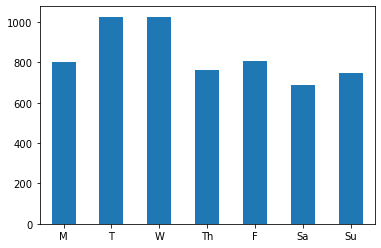

In [27]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [28]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-01-12 14:04:49,my3.my.umbc.edu,Wednesday,2,False
1,2022-01-12 14:04:51,webauth.umbc.edu,Wednesday,2,False
2,2022-01-12 14:04:51,webauth.umbc.edu,Wednesday,2,False
3,2022-01-12 14:05:00,webauth.umbc.edu,Wednesday,2,False
4,2022-01-12 14:05:01,my3.my.umbc.edu,Wednesday,2,False


In [29]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]

In [30]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
131,2022-01-15 20:13:36,mail.google.com,Saturday,5,True
132,2022-01-15 20:13:41,webauth.umbc.edu,Saturday,5,True
133,2022-01-15 20:13:41,webauth.umbc.edu,Saturday,5,True
134,2022-01-15 20:13:43,webauth.umbc.edu,Saturday,5,True
135,2022-01-15 20:13:43,webauth.umbc.edu,Saturday,5,True


In [31]:
weekday['domain'].value_counts()[:5]


www.google.com         795
webauth.umbc.edu       720
my.umbc.edu            236
github.com             225
blackboard.umbc.edu    216
Name: domain, dtype: int64

In [32]:
weekend['domain'].value_counts()[:5]


www.google.com         356
webauth.umbc.edu       148
github.com             128
blackboard.umbc.edu     68
www.amazon.com          59
Name: domain, dtype: int64

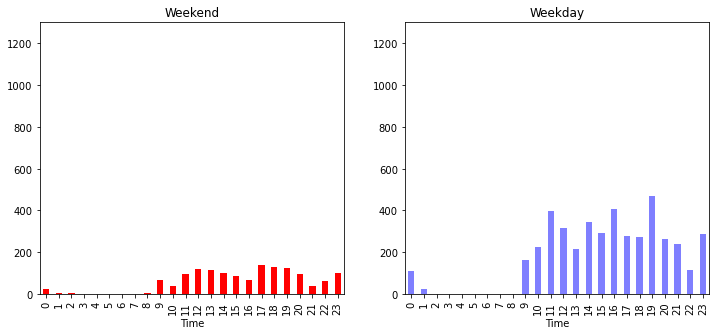

In [33]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()

In [34]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

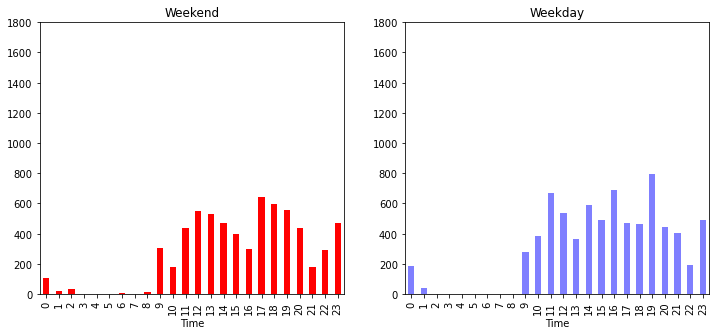

In [35]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [36]:
df['domain'].value_counts()[:10]


www.google.com             1151
webauth.umbc.edu            868
github.com                  353
blackboard.umbc.edu         284
my.umbc.edu                 283
umbc-csm.symplicity.com     215
www.amazon.com              197
watchseries.pub             168
leetcode.com                150
csprd-web.ps.umbc.edu       132
Name: domain, dtype: int64

In [37]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [38]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

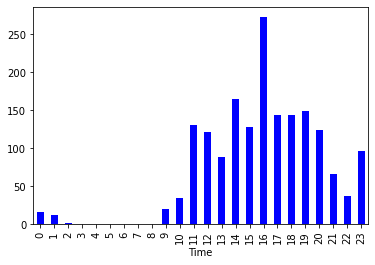

In [39]:
_= show_domain_stats('google', 'blue')

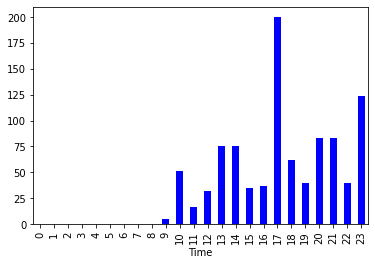

In [40]:
_= show_domain_stats('github', 'blue')


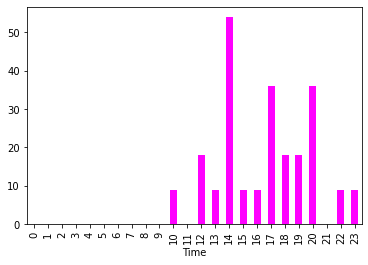

In [41]:
_ = show_domain_stats('stackover', 'magenta')


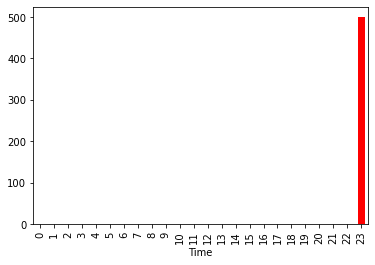

In [42]:
_ = show_domain_stats('vibeaccount', 'red')


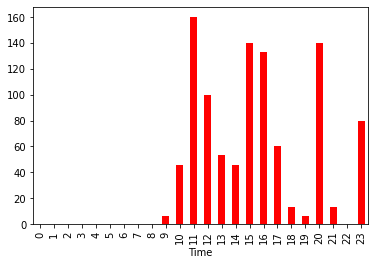

In [46]:
_ = show_domain_stats('leetcode', 'red')


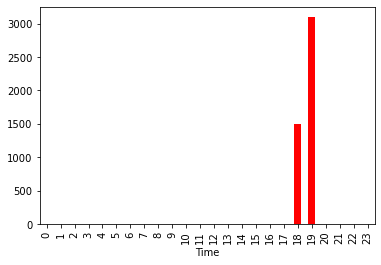

In [44]:
_ = show_domain_stats('bankofamerica', 'red')


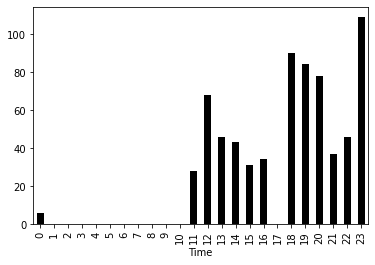

In [45]:
_=show_domain_stats('amazon', 'black')
